In [1]:
#Import Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("E:\pankaj\ds project\Project1\Reviews.csv") #Load Data

In [3]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
data.Summary.value_counts()

Delicious!                                 2462
Delicious                                  2316
Yummy!                                     1594
Yummy                                      1268
Great product                              1091
                                           ... 
i buy this in bulk                            1
Makes a super easy jerk marinade              1
Best for Diabetics                            1
A great change for those who love rice.       1
Favorite Training and reward treat            1
Name: Summary, Length: 295742, dtype: int64

In [5]:
data.shape

(568454, 10)

In [6]:
data.isna().sum() #check for null Values

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
data=data.dropna()#Drop Null Values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


# 1. Find various trends and patterns in the reviews data, create useful insights that best describe the product quality

In [9]:
product=data.groupby('ProductId')['Score'].mean().round().reset_index()
productdf=pd.DataFrame(product).sort_values('Score',ascending=False)

In [10]:
#Score As per Product
productdf

,ProductId,Score
37129,B00214BO58,5.0
42488,B002SAOPHY,5.0
42448,B002RYY23I,5.0
42451,B002RYY2G0,5.0
42453,B002RYY2YW,5.0
...,...,...
71239,B007KIX0FC,1.0
68402,B0069TZRCM,1.0
42991,B002UKXCQM,1.0
58782,B004M5YINY,1.0


In [11]:
#Ratings given Products
for i in range (0,6):
    pr=productdf[productdf['Score']==i]
    pr1=pr.shape[0]
    print(f'There are:{pr1} Products having average rating as:{i}')

There are:0 Products having average rating as:0
There are:3652 Products having average rating as:1
There are:3238 Products having average rating as:2
There are:7267 Products having average rating as:3
There are:23259 Products having average rating as:4
There are:36842 Products having average rating as:5


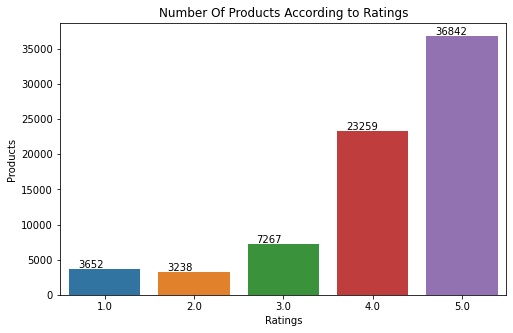

In [12]:
#plot Number Of Products According to Ratings
plt.figure(figsize=(8,5))
plt.title('Number Of Products According to Ratings')
plot=sns.countplot(x='Score',data=productdf)
plt.xlabel('Ratings')
plt.ylabel('Products')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+0.1,p.get_height()+200))
plt.show()

In [13]:
#check For less Than 4 Rating Products
summ=0
for i in range (0,4):
    low=productdf[productdf['Score']==i]
    low1=low.shape[0]
    summ=summ+low1
print(f'We Have to Improve Quality of {summ} Products Which Have Less Than 4 Ratings')

We Have to Improve Quality of 14157 Products Which Have Less Than 4 Ratings


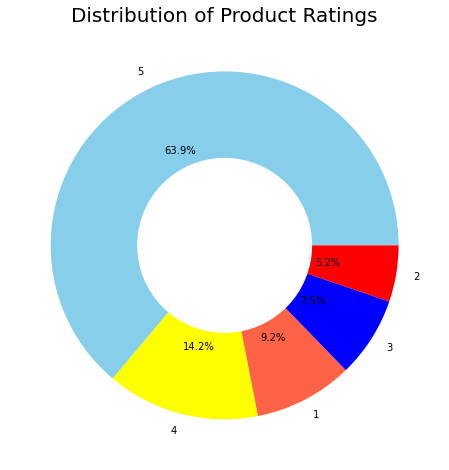

In [14]:
#plot for Distribution of Product Ratings
ratings = data["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellow", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, autopct='%1.1f%%',labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Product Ratings", fontsize=20)
plt.show()

# 2. Classify each review based on the sentiment associated with the same.

In [15]:
data=data.reset_index()
data=data.iloc[:,1:]

In [16]:
#Cleaning Data
from string import punctuation

def remove_punctuation(text):
    free="".join([i for i in text if i not in punctuation])
    return free
data['cleanPunctuation']=data['Summary'].apply(lambda x:remove_punctuation(x))#Remove Punctuation
    

data['Lower']=data['cleanPunctuation'].apply(lambda x: x.lower())#Lowering the text

In [17]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleanPunctuation,Lower
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog Food,good quality dog food
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised,not as advertised
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Delight says it all,delight says it all
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine,cough medicine
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy,great taffy


In [18]:
#Classify Review Using Vader Sentiment Intensity Analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [19]:
data["compound"] = [sentiments.polarity_scores(i)["compound"] for i in data["Lower"]] #adding Compound Score Column

<AxesSubplot:xlabel='Score', ylabel='compound'>

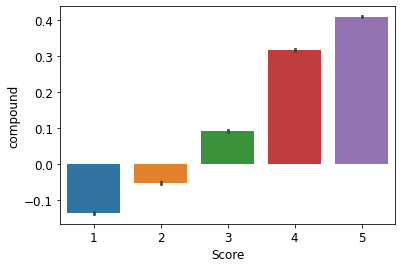

In [20]:
#plot Score vs Compound
sns.barplot(data=data, x='Score', y='compound')

In [21]:
#divide Reviews in Happy, Sad and Neutral Sentiments
Sentiment1=[]
for i in range(0,568411):
    if data['compound'][i] >= 0.1:
        Sentiment1.append('Happy')
    elif data['compound'][i] <= 0:
        Sentiment1.append('Sad')
    else:
        Sentiment1.append('Neutral')

In [22]:
data['Sentiments']=Sentiment1 #We Successfully Added Sentinment Column In this Dataset

In [23]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleanPunctuation,Lower,compound,Sentiments
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog Food,good quality dog food,0.4404,Happy
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised,not as advertised,0.0000,Sad
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Delight says it all,delight says it all,0.5994,Happy
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine,cough medicine,0.0000,Sad
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy,great taffy,0.6249,Happy


# Evaluation of model

In [24]:
evdata=data.copy()

In [25]:
evdata=evdata[['Score','Sentiments']]

In [26]:
evdata.head()

,Score,Sentiments
0,5,Happy
1,1,Sad
2,4,Happy
3,2,Sad
4,5,Happy


In [27]:
# we make sentiments in 3 categories but ratings have 5 categories
#so Make ratings to 3 categories
#here we assume Happy customers give 4 or 5 rating, netral customers give 3 rating and Sad customers give 1 or 2 rating

In [28]:
evdata['Score']=evdata['Score'].map({1:'Sad',2:'Sad',3:'Neutral',4:'Happy',5:'Happy'})

In [29]:
evdata.head()

,Score,Sentiments
0,Happy,Happy
1,Sad,Sad
2,Happy,Happy
3,Sad,Sad
4,Happy,Happy


In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
accuracy_score(evdata['Score'],evdata['Sentiments'])

0.668716826380911

In [32]:
confusion_matrix(evdata['Score'],evdata['Sentiments'])

array([[311138,   1934, 130694],
       [ 16828,    389,  25421],
       [ 12704,    724,  68579]], dtype=int64)

In [33]:
print(classification_report(evdata['Score'],evdata['Sentiments']))

              precision    recall  f1-score   support

       Happy       0.91      0.70      0.79    443766
     Neutral       0.13      0.01      0.02     42638
         Sad       0.31      0.84      0.45     82007

    accuracy                           0.67    568411
   macro avg       0.45      0.52      0.42    568411
weighted avg       0.77      0.67      0.69    568411



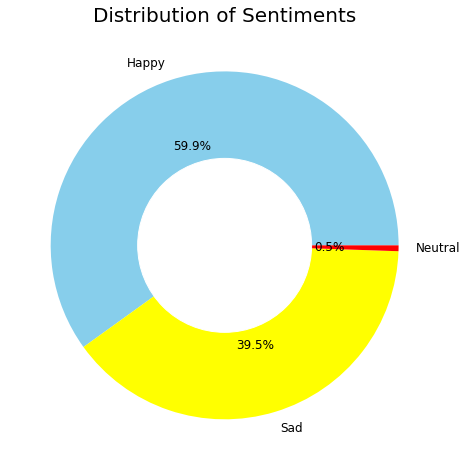

In [34]:
#plot for Distribution of Sentiments
Sentiments = evdata["Sentiments"].value_counts()
numbers = Sentiments.index
quantity = Sentiments.values

custom_colors = ["skyblue", "yellow", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, autopct='%1.1f%%',labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Sentiments", fontsize=20)
plt.show()